In [1]:
#TODO: add text and explanation to this notebook

In [2]:
import IPython

%matplotlib inline
import matplotlib.pyplot as plt
import torchaudio
import torch

import os,sys,inspect
sys.path.insert(0, "..")

from src.data import podcast
from src.dataprocessing import transforms as T
from src.utils import hparams

In [3]:
podcast = podcast.PODCAST(root="../data/Podcast", audio_folder="corpus", text_file="metadata_TCC.csv")
dataloader_podcast = torch.utils.data.DataLoader(podcast)
dataiter = iter(dataloader_podcast)

In [4]:
waveform1, sample_rate1, utterance1, speaker_id1, chapter_id1, utterance_id1 = dataiter.next()
waveform2, sample_rate2, utterance2, speaker_id2, chapter_id2, utterance_id2 = dataiter.next()

In [5]:
hp = hparams.HParams(sample_rate=sample_rate1.item())

## Wave to Spectrogram and Spectrogram to Wave

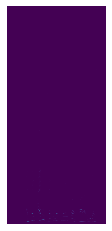

In [6]:
# Preparation and Transformation
spectrogram = T.wave_to_spectrogram(waveform1[0][0], hp)
T.plot_spectrogram(spectrogram, hp)

Waveform 0, shape: torch.Size([1, 1, 89061])
Waveform 0, Sample rate: 22050


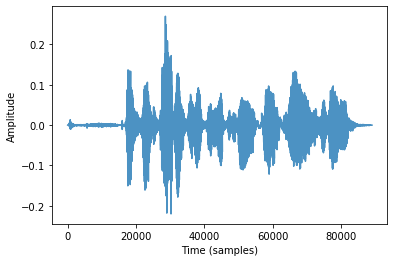

In [7]:
# Original
T.plot_wave([waveform1], hp)

Waveform 0, shape: torch.Size([88832])
Waveform 0, Sample rate: 22050


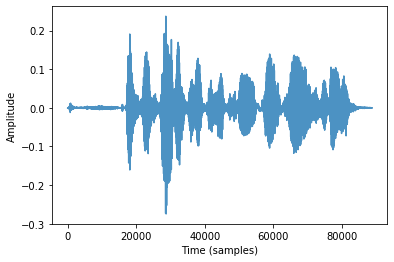

In [8]:
# Reconstructed
wave_rec = T.spectrogram_to_wave(spectrogram, hp, n_iter=1000)
T.plot_wave([wave_rec], hp)

In [9]:
# difference between waves
print(waveform1.flatten().shape, wave_rec.shape)
print(torch.sum(torch.abs(wave_rec-waveform1.flatten()[:len(wave_rec)])))
print(torch.sum(torch.abs(wave_rec-waveform1.flatten()[:len(wave_rec)]))/torch.sum(torch.abs(waveform1.flatten()[:len(wave_rec)])))

torch.Size([89061]) torch.Size([88832])
tensor(2163.7190)
tensor(1.5323)


In [10]:
print("Original:")
IPython.display.Audio(data=waveform1.flatten().numpy(), rate=hp.sample_rate)

Original:


In [11]:
print("Reconstructed:")
IPython.display.Audio(data=wave_rec.numpy(), rate=hp.sample_rate)

Reconstructed:


In [12]:
print("Wave: ", waveform1.flatten().shape)
print("Spectrogram: ", spectrogram.shape)
print("Wave_rec: ", wave_rec.shape)

Wave:  torch.Size([89061])
Spectrogram:  torch.Size([769, 348])
Wave_rec:  torch.Size([88832])


## Spectrogram to Spectrogram dB and Spectrogram dB to Spectrogram

In [13]:
# Preparation
spectrogram = T.wave_to_spectrogram(waveform1[0][0], hp)

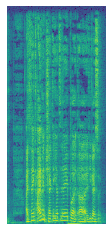

In [14]:
# Transformation
spectrogram_db = T.amplitude_to_db(spectrogram, hp)
T.plot_spectrogram(spectrogram_db, hp)

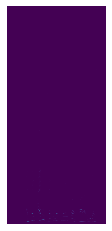

In [15]:
# Original
T.plot_spectrogram(spectrogram, hp)

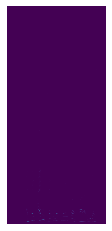

In [16]:
# Reconstructed
spectrogram_rec_from_db = T.db_to_amplitude(spectrogram_db, hp)
T.plot_spectrogram(spectrogram_rec_from_db, hp)

In [17]:
# difference between spectrograms
print(torch.sum(torch.abs(spectrogram_rec_from_db-spectrogram)))
print(torch.sum(torch.abs(spectrogram_rec_from_db-spectrogram))/torch.sum(torch.abs(spectrogram)))

tensor(0.0139)
tensor(1.2360e-07)


In [18]:
print("Spectrogram: ", spectrogram.shape)
print("Spectrogram_db: ", spectrogram_db.shape)
print("Spectrogram_rec_from_db: ", spectrogram_rec_from_db.shape)

Spectrogram:  torch.Size([769, 348])
Spectrogram_db:  torch.Size([769, 348])
Spectrogram_rec_from_db:  torch.Size([769, 348])


## Spectrogram to MelSpectrogram and MelSpectrogram to Spectrogram

In [19]:
# Preparation
spectrogram = T.wave_to_spectrogram(waveform1[0][0], hp)

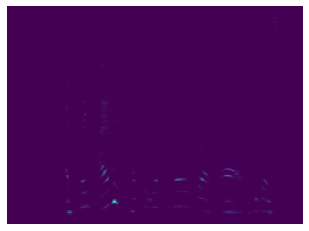

In [20]:
# Transformation
melspectrogram = T.spectrogram_to_melspectrogram(spectrogram, hp)
T.plot_melspectrogram(melspectrogram, hp)

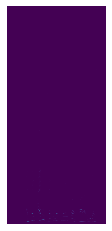

In [21]:
# Original
T.plot_spectrogram(spectrogram, hp)

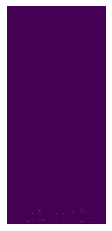

In [22]:
# Reconstructed
spectrogram_rec_from_mel = T.melspectrogram_to_spectrogram(melspectrogram, hp)
T.plot_spectrogram(spectrogram_rec_from_mel, hp)

In [23]:
# difference between spectrograms
print(torch.sum(torch.abs(spectrogram_rec_from_mel-spectrogram)))
print(torch.sum(torch.abs(spectrogram_rec_from_mel-spectrogram))/torch.sum(torch.abs(spectrogram)))

tensor(9891.0850)
tensor(0.0877)


In [24]:
print("Spectrogram: ", spectrogram.shape)
print("Melspectrogram: ", melspectrogram.shape)
print("Spectrogram_rec_from_mel: ", spectrogram_rec_from_mel.shape)

Spectrogram:  torch.Size([769, 348])
Melspectrogram:  torch.Size([256, 348])
Spectrogram_rec_from_mel:  torch.Size([769, 348])


## MelSpectrogram to MelSpectrogram dB and MelSpectrogram dB to MelSpectrogram

In [25]:
# Preparation
melspectrogram = T.wave_to_melspectrogram(waveform1[0][0], hp)

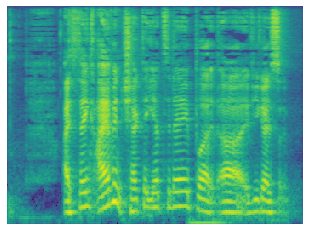

In [26]:
# Transformation
melspectrogram_db = T.amplitude_to_db(melspectrogram, hp)
T.plot_melspectrogram(melspectrogram_db, hp)

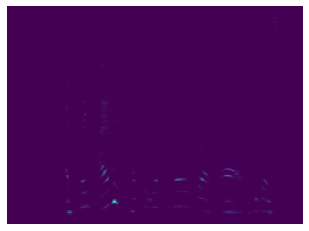

In [27]:
# Original
T.plot_melspectrogram(melspectrogram, hp)

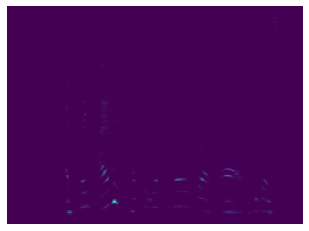

In [28]:
# reconstructed
melspectrogram_rec_from_db = T.db_to_amplitude(melspectrogram_db, hp)
T.plot_melspectrogram(melspectrogram_rec_from_db, hp)

In [29]:
# difference between spectrograms
print(torch.sum(torch.abs(melspectrogram_rec_from_db-melspectrogram)))
print(torch.sum(torch.abs(melspectrogram_rec_from_db-melspectrogram))/torch.sum(torch.abs(melspectrogram)))

tensor(0.0138)
tensor(1.2285e-07)


In [30]:
print("Melspectrogram: ", melspectrogram.shape)
print("Melspectrogram_db: ", melspectrogram_db.shape)
print("Melspectrogram_rec_from_db: ", melspectrogram_rec_from_db.shape)

Melspectrogram:  torch.Size([256, 348])
Melspectrogram_db:  torch.Size([256, 348])
Melspectrogram_rec_from_db:  torch.Size([256, 348])


## Extra: impact of applying amplitude_to_db conversion before MelScale

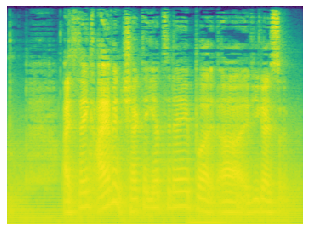

In [31]:
import torchaudio
# waveform -> linear spectrogram -> amplitude to db -> mel spectrogram
spectrogram = T.wave_to_spectrogram(waveform1[0][0], hp)
spectrogram_db = T.amplitude_to_db(spectrogram, hp)
melspectrogram = T.spectrogram_to_melspectrogram(spectrogram_db, hp)
T.plot_melspectrogram(melspectrogram, hp)

## Complete Pipeline:
Wave - Spectrogram - MelSpectrogram - MelSpectrogram dB - MelSpectrogram - Wave 

In [32]:
wave_orig = waveform1[0][0]
spectrogram_orig = T.wave_to_spectrogram(wave_orig, hp)
melspectrogram_orig = T.spectrogram_to_melspectrogram(spectrogram_orig, hp)
melspectrogram_db_orig = T.amplitude_to_db(melspectrogram_orig, hp)
melspectrogram_rec = T.db_to_amplitude(melspectrogram_db_orig, hp)
spectrogram_rec = T.melspectrogram_to_spectrogram(melspectrogram_rec, hp)
wave_rec = T.spectrogram_to_wave(spectrogram_rec, hp, n_iter=1000)

In [33]:
# difference between waves
print(wave_orig.shape, wave_rec.shape)
print(torch.sum(torch.abs(wave_rec-wave_orig[:len(wave_rec)])))
print(torch.sum(torch.abs(wave_rec-wave_orig[:len(wave_rec)]))/torch.sum(torch.abs(wave_orig[:len(wave_rec)])))

torch.Size([89061]) torch.Size([88832])
tensor(1951.0543)
tensor(1.3817)


Waveform 0, shape: torch.Size([1, 1, 89061])
Waveform 0, Sample rate: 22050


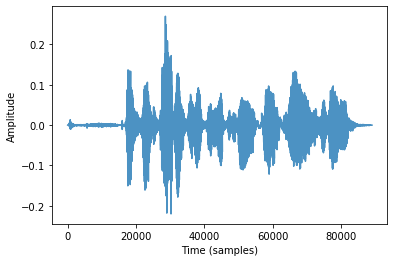

In [34]:
# Original
T.plot_wave([waveform1], hp)

Waveform 0, shape: torch.Size([88832])
Waveform 0, Sample rate: 22050


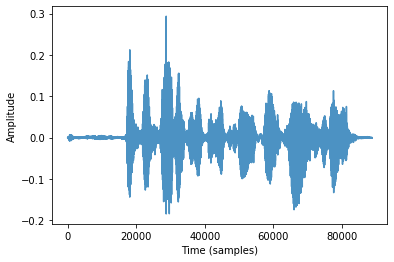

In [35]:
T.plot_wave([wave_rec], hp)

In [36]:
print("Original:")
IPython.display.Audio(data=wave_orig.numpy(), rate=hp.sample_rate)

Original:


In [37]:
print("Reconstructed:")
IPython.display.Audio(data=wave_rec.numpy(), rate=hp.sample_rate)

Reconstructed:
